### Question 4 -
##### Write a program to download the data from the link given below and then read the data and convert the into the proper structure and return it as a CSV file.
#### Link - https://data.nasa.gov/resource/y77d-th95.json



### Question 7 -
###### Using the data from Question 4, write code to analyze the data and answer the following questions Note -
* 1. Draw plots to demonstrate the analysis for the following questions for better visualizations
* 2. Write code comments wherever required for code understanding

In [1]:
#import libraries and tools
import warnings
import numpy as np
import pandas as pd
import json
import seaborn as sns
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
#import dataset
def enter_data(dataset):
    data=pd.read_json(dataset)
    df_cv=data.to_csv('nasa.csv',index=False)
    return df_cv

In [20]:
enter_data('https://data.nasa.gov/resource/y77d-th95.json')

In [21]:
#import the csv file after conversion
data=pd.read_csv('nasa.csv')
data.head()

name   id nametype     recclass      mass  fall  \
0    Aachen    1    Valid           L5      21.0  Fell   
1    Aarhus    2    Valid           H6     720.0  Fell   
2      Abee    6    Valid          EH4  107000.0  Fell   
3  Acapulco   10    Valid  Acapulcoite    1914.0  Fell   
4   Achiras  370    Valid           L6     780.0  Fell   

                      year    reclat    reclong  \
0  1880-01-01T00:00:00.000  50.77500    6.08333   
1  1951-01-01T00:00:00.000  56.18333   10.23333   
2  1952-01-01T00:00:00.000  54.21667 -113.00000   
3  1976-01-01T00:00:00.000  16.88333  -99.90000   
4  1902-01-01T00:00:00.000 -33.16667  -64.95000   

                                         geolocation  \
0  {'type': 'Point', 'coordinates': [6.08333, 50....   
1  {'type': 'Point', 'coordinates': [10.23333, 56...   
2  {'type': 'Point', 'coordinates': [-113, 54.216...   
3  {'type': 'Point', 'coordinates': [-99.9, 16.88...   
4  {'type': 'Point', 'coordinates': [-64.95, -33....   

   :@computed_region_cbhk_fwbd  :@computed_region_nnqa_25f4  
0                          NaN                          NaN  
1                          NaN                          NaN  
2                          NaN                          NaN  
3                          NaN                          NaN  
4                          NaN                          NaN

In [41]:
df_year=data.copy()

In [42]:
#year for null values
df_year[df_year['year'].isna()]

name     id nametype recclass   mass   fall year  reclat  \
37  Northwest Africa 5815  50693    Valid       L5  256.8  Found  NaN     0.0   

    reclong                               geolocation  \
37      0.0  {'type': 'Point', 'coordinates': [0, 0]}   

    :@computed_region_cbhk_fwbd  :@computed_region_nnqa_25f4  
37                          NaN                          NaN

In [43]:
#drpping the null value or row index=37
df_year=df_year.drop(index=37)

In [127]:
#finding the names below year 2000
yr=[]
k=[]
for i in df_year['year']:
    strng=i.split('T')
    date=strng[0]
    d1=date.split('-')
    y1=d1[0]
    yr.append(y1)
df_year['year_only']=yr
df_year['year_only']=df_year['year_only'].astype(int)
selected_values = df_year.loc[df_year['year_only'] < 2000, 'name']
print(selected_values.values)

['Aachen' 'Aarhus' 'Abee' 'Acapulco' 'Achiras' 'Adhi Kot'
 'Adzhi-Bogdo (stone)' 'Agen' 'Aguada' 'Aguila Blanca' 'Aioun el Atrouss'
 'Aïr' 'Aire-sur-la-Lys' 'Akaba' 'Akbarpur' 'Akwanga' 'Akyumak' 'Al Rais'
 'Alais' 'Albareto' 'Alberta' 'Aldsworth' 'Aleppo' 'Alessandria'
 'Alexandrovsky' 'Alfianello' 'Allegan' 'Allende' "Alta'ameem"
 'Ambapur Nagla' 'Andhara' 'Andover' 'Andreevka' 'Andura' 'Angers'
 'Angra dos Reis (stone)' 'Ankober' 'Anlong' 'Aomori' 'Appley Bridge'
 'Apt' 'Arbol Solo' 'Archie' 'Arroyo Aguiar' 'Asco' 'Ashdon' 'Assisi'
 'Atarra' 'Atemajac' 'Athens' 'Atoka' 'Aubres' 'Aumale' 'Aumieres'
 'Ausson' 'Avanhandava' 'Avce' 'Avilez' 'Awere' 'Aztec' 'Bachmut' 'Bahjoi'
 'Bald Mountain' 'Baldwyn' 'Bali' 'Ban Rong Du' 'Bandong' 'Bansur'
 'Banswal' 'Banten' 'Barbotan' 'Barcelona (stone)' 'Barea' 'Barnaul'
 'Barntrup' 'Baroti' 'Barwell' 'Baszkówka' 'Bath' 'Bath Furnace' 'Bawku'
 'Baxter' 'Beardsley' 'Beaver Creek' 'Beddgelert' 'Bells' 'Belville'
 'Benares (a)' 'Benld' 'Benoni' 'Benton

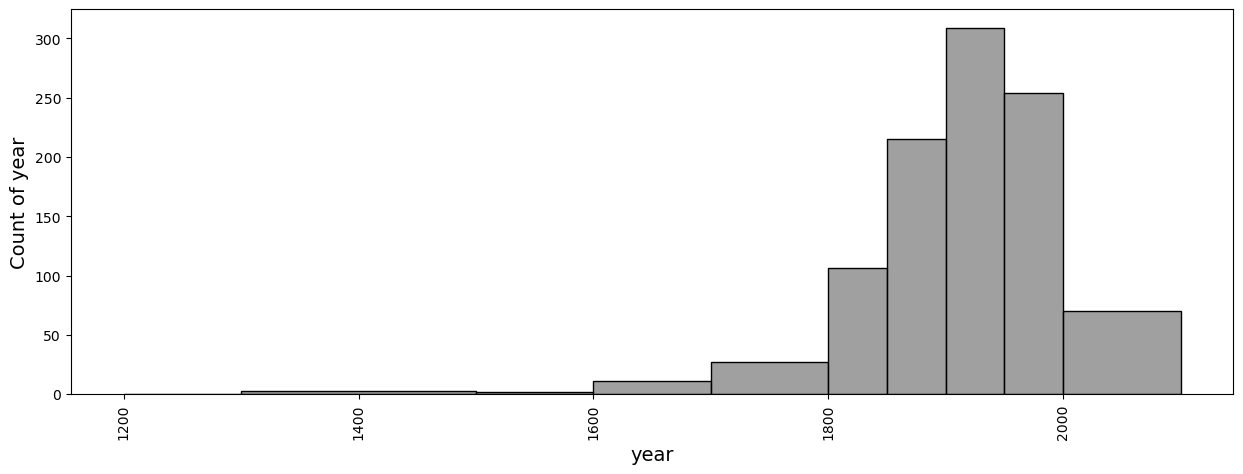

In [143]:
#plotting year and counts
axs,fig =plt.subplots(1,1,figsize=(15,5))
plt.subplot(111)
sns.histplot(data=df_year,x='year_only',bins=[1200,1300,1500,1600,1700,1800,1850,1900,1950,2000,2100],color='grey')
plt.xlabel("year", size=14) 
plt.ylabel("Count of year", size=14)
plt.xticks(rotation=90)
plt.show()

In [201]:
#values below year 1970
df_geo = df_year.loc[df_year['year_only'] < 1970]
df_geo[df_geo['geolocation'].values=='nan']

name     id nametype recclass    mass  fall  \
147     Bulls Run   5163    Valid    Iron?  2250.0  Fell   
208       Clohars   5383    Valid       L4    48.6  Fell   
414      Jemlapur  12079    Valid       L6   450.0  Fell   
586  Maria Linden  15418    Valid       L4   114.0  Fell   
694    Niger (L6)  16974    Valid       L6     3.3  Fell   
695   Niger (LL6)  16975    Valid      LL6     3.3  Fell   

                        year  reclat  reclong geolocation  \
147  1964-01-01T00:00:00.000     NaN      NaN         nan   
208  1822-01-01T00:00:00.000     NaN      NaN         nan   
414  1901-01-01T00:00:00.000     NaN      NaN         nan   
586  1925-01-01T00:00:00.000     NaN      NaN         nan   
694  1967-01-01T00:00:00.000     NaN      NaN         nan   
695  1967-01-01T00:00:00.000     NaN      NaN         nan   

     :@computed_region_cbhk_fwbd  :@computed_region_nnqa_25f4  year_only  
147                          NaN                          NaN       1964  
208                          NaN                          NaN       1822  
414                          NaN                          NaN       1901  
586                          NaN                          NaN       1925  
694                          NaN                          NaN       1967  
695                          NaN                          NaN       1967

In [202]:
#dropping respective values for etter analysing
df_geo=df_geo.drop(index=[147,208,414,586,694,695])

In [221]:

xx=[]
yy=[]
df_geo['geolocation']=df_geo['geolocation'].astype(str)
for j in df_geo['geolocation']:
    sp=j.split(',')
    c1=sp[0]
    c2=sp[1]
    coo_x=c2.split(':')
    coo_x1=coo_x[1].split('[')
    x=coo_x1[1]
    xx.append(x)
    c3=sp[2]
    coo_y=c3.split(']}')
    y=coo_y[0]
    yy.append(y)
df_geo['x_coordinate']=xx
df_geo['y_coordinate']=yy

In [225]:
df_geo['name'].values

array(['Aachen', 'Aarhus', 'Abee', 'Achiras', 'Adhi Kot',
       'Adzhi-Bogdo (stone)', 'Agen', 'Aguada', 'Aguila Blanca', 'Aïr',
       'Aire-sur-la-Lys', 'Akaba', 'Akbarpur', 'Akwanga', 'Al Rais',
       'Alais', 'Albareto', 'Alberta', 'Aldsworth', 'Aleppo',
       'Alessandria', 'Alexandrovsky', 'Alfianello', 'Allegan', 'Allende',
       'Ambapur Nagla', 'Andhara', 'Andover', 'Andreevka', 'Andura',
       'Angers', 'Angra dos Reis (stone)', 'Ankober', 'Appley Bridge',
       'Apt', 'Arbol Solo', 'Archie', 'Arroyo Aguiar', 'Asco', 'Ashdon',
       'Assisi', 'Atarra', 'Atemajac', 'Athens', 'Atoka', 'Aubres',
       'Aumale', 'Aumieres', 'Ausson', 'Avanhandava', 'Avce', 'Avilez',
       'Awere', 'Aztec', 'Bachmut', 'Bahjoi', 'Bald Mountain', 'Baldwyn',
       'Bali', 'Bandong', 'Bansur', 'Banswal', 'Banten', 'Barbotan',
       'Barcelona (stone)', 'Barea', 'Barnaul', 'Barntrup', 'Baroti',
       'Barwell', 'Bath', 'Bath Furnace', 'Baxter', 'Beardsley',
       'Beaver Creek', 'Beddgeler

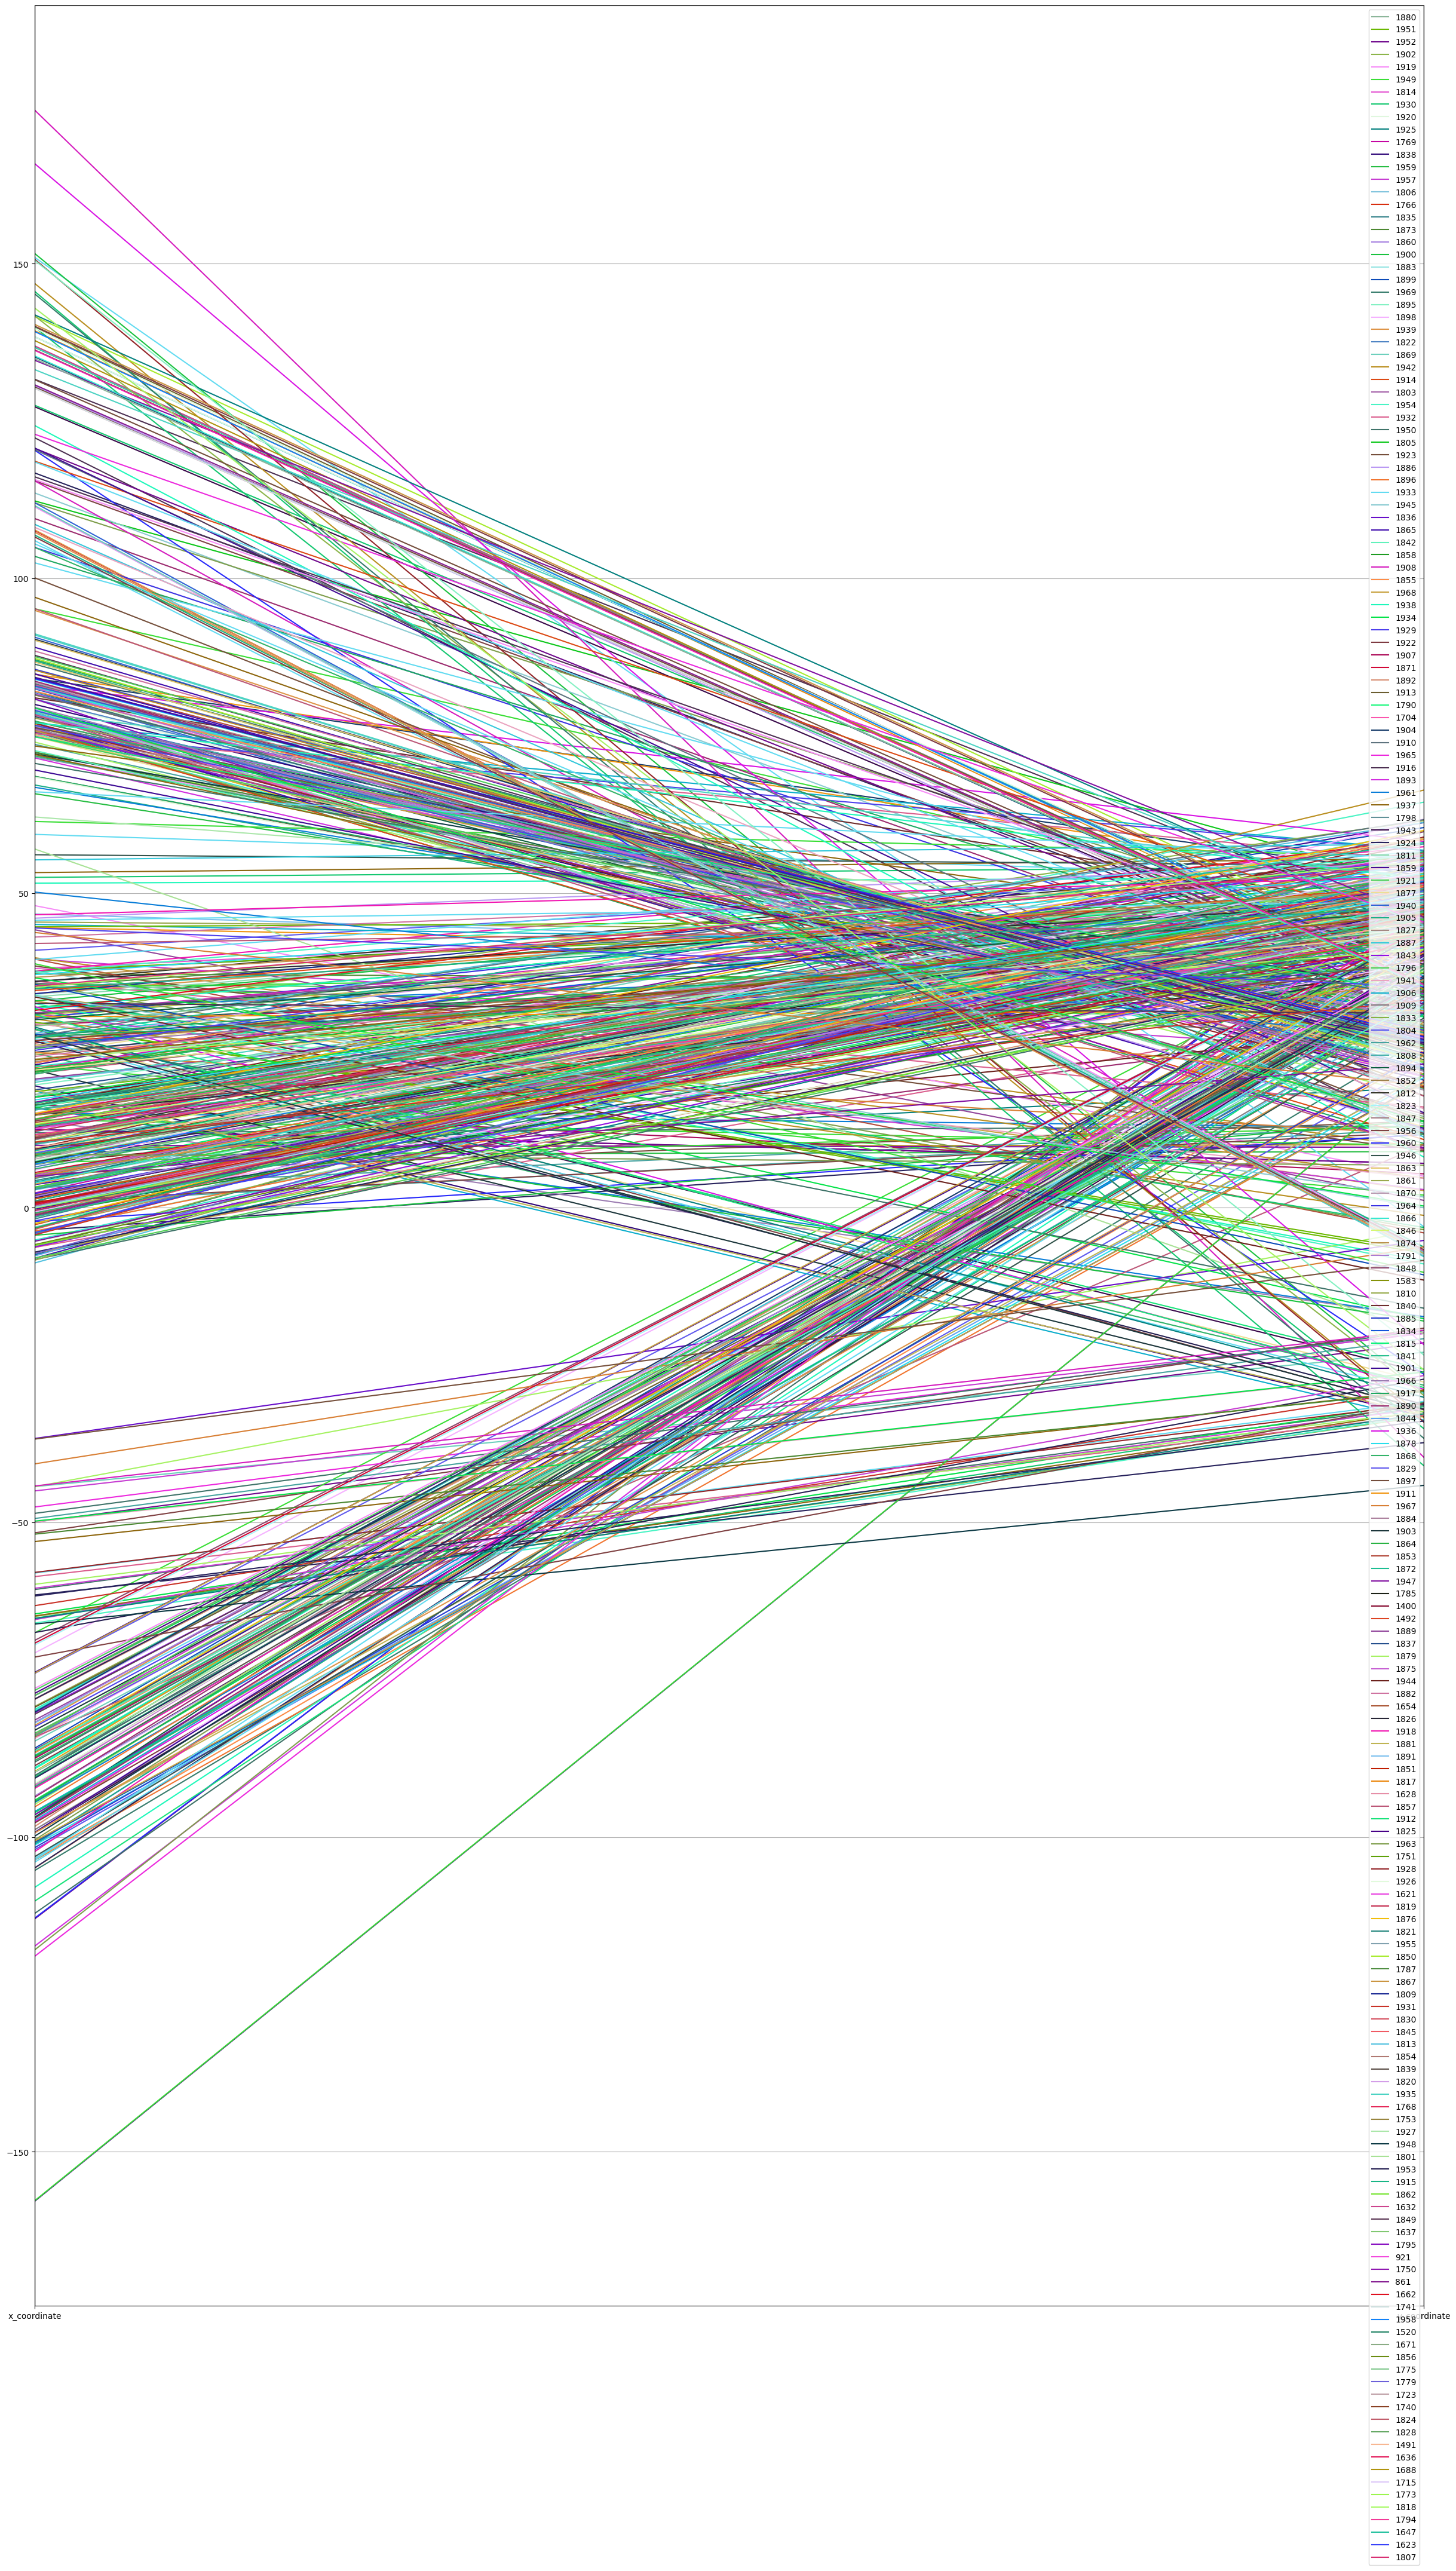

In [253]:
#paire wise parallel plotting with wear and ccordinates
axs,fig =plt.subplots(1,1,figsize=(30,50))
plt.subplot(111)
pd.plotting.parallel_coordinates(df_geo,"year_only", cols=["x_coordinate","y_coordinate"])
plt.show()

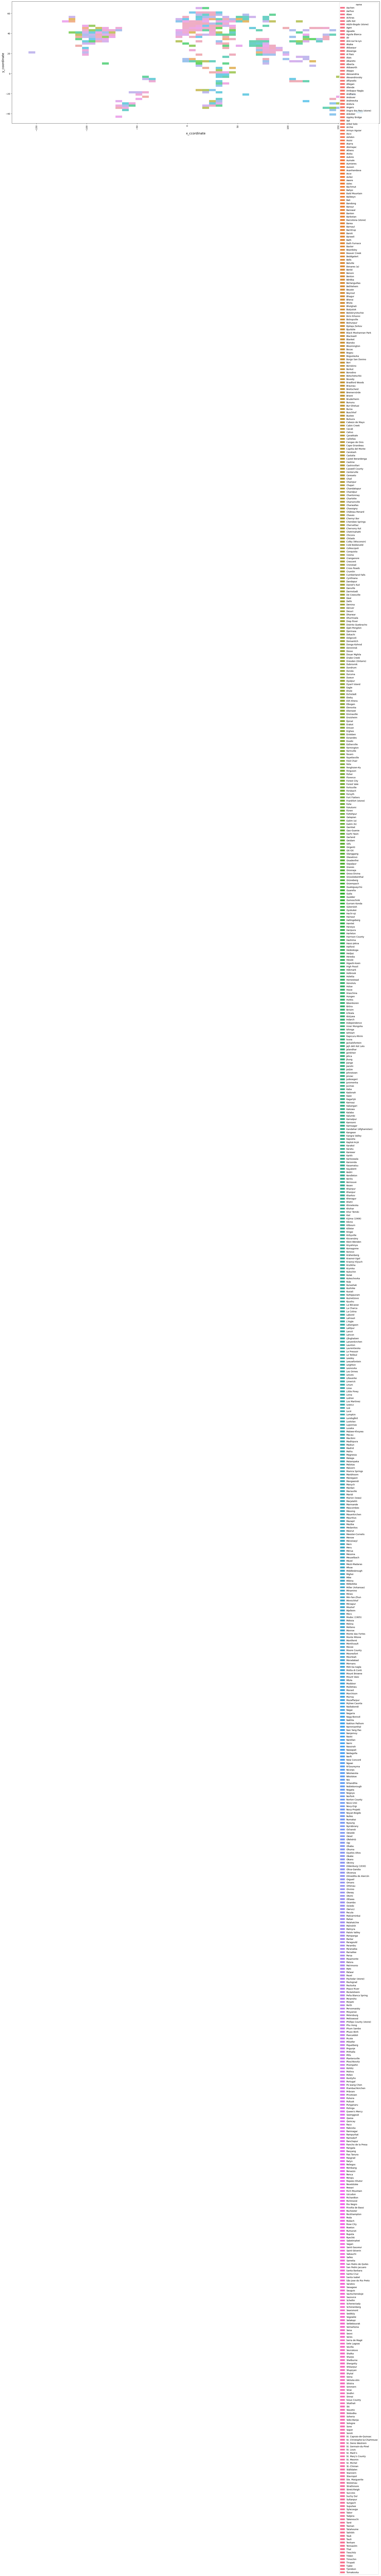

In [252]:
df_geo['x_coordinate']=df_geo['x_coordinate'].astype(float)
df_geo['y_coordinate']=df_geo['y_coordinate'].astype(float)
axs,fig =plt.subplots(1,1,figsize=(30,10))
plt.subplot(111)
sns.histplot(data=df_geo, x="x_coordinate", y="y_coordinate",bins=50,color='b',hue='name')
plt.xlabel("x_ccordinate", size=14) 
plt.ylabel("y_coordinate", size=14)
plt.xticks(rotation=90)
plt.show()

In [254]:
df_mass=data.copy()
df_mass['mass'].isna().sum()

28

In [255]:
df_mass['mass']=df_mass['mass'].fillna(df_mass['mass'].median)

In [276]:
df_mass['mass'] = pd.to_numeric(df_mass['mass'], errors='coerce')
df_mass_less=df_mass.loc[df_mass['mass']> 10000]

In [278]:
df_mass_less['name'].values

array(['Abee', 'Agen', 'Aïr', 'Akyumak', 'Alfianello', 'Allegan',
       'Allende', 'Andura', 'Appley Bridge', 'Aumale', 'Ausson',
       'Bachmut', 'Bahjoi', 'Ban Rong Du', 'Bandong', 'Bansur', 'Barwell',
       'Bassikounou', 'Baszkówka', 'Bath', 'Bath Furnace', 'Beardsley',
       'Beaver Creek', 'Benguerir', "Beni M'hira", 'Bensour', 'Béréba',
       'Bilanga', 'Bjurböle', 'Boguslavka', 'Braunau', 'Bruderheim',
       'Bur-Gheluai', 'Bursa', 'Butsura', 'Buzzard Coulee',
       'Cabezo de Mayo', 'Cabin Creek', 'Campos Sales', 'Cangas de Onis',
       'Castrovillari', 'Chajari', 'Chantonnay', 'Charsonville',
       'Charwallas', 'Château-Renard', 'Chelyabinsk', 'Chergach ',
       'Colby (Wisconsin)', 'Conquista', 'Cumberland Falls', 'Dahmani',
       'Demina', 'Dergaon', 'Desuri', 'Devgaon', 'Dhajala', 'Dhurmsala',
       'Djati-Pengilon', 'Dong Ujimqin Qi', 'Dresden (Ontario)', 'Durala',
       'El Paso de Aguila', 'Elbogen', 'Elenovka', 'Ensisheim', 'Ergheo',
       'Estherville',

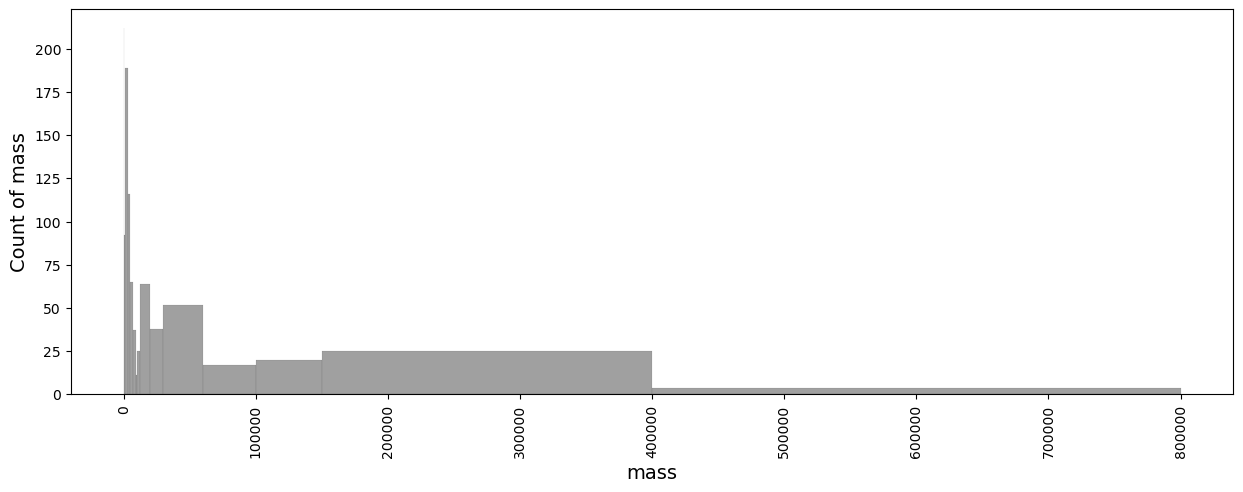

In [304]:
#plotting mass
axs,fig =plt.subplots(1,1,figsize=(15,5))
plt.subplot(111)
sns.histplot(data=df_mass,x='mass',bins=[0,500,1000,3000,5000,7000,9000,10000,12000,20000,30000,60000,100000,150000,400000,800000],color='grey')
plt.xlabel("mass", size=14) 
plt.ylabel("Count of mass", size=14)
plt.xticks(rotation=90)
plt.show()